<a href="https://colab.research.google.com/github/Amitish/Zomato-ML-Project/blob/main/Zomato_Mid_Assessment_ML1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Mid Assessment- Zomato   

# **Project Summary -**

This project involves employing advanced data analytics techniques to delve into the intricacies of restaurants and customer feedback on the widely-used online food delivery platform, Zomato.

The dataset encompasses a range of information, including restaurant names, locations, cuisines, average cost for two, ratings, and user reviews.

We will be looking after the crucial task of data cleaning and preprocessing. Eliminating duplicate entries, addressing missing values, and transforming the data into a suitable format for analysis.

Moving forward, we will implement clustering on the restaurant data using the k-means algorithm. The aim will be to group similar restaurants together and uncover underlying patterns within the dataset.

The findings generated from this analysis will have the potential to provide valuable guidance to both restaurants and customers in making informed decisions. Moreover, the project could be extended to other cities or countries to explore eating habits and preferences across different regions.



# **Problem Statement -**

The objective of this project is to delve into the dynamics of the restaurant industry in India through an analysis of data sourced from Zomato, a leading restaurant aggregator and food delivery start-up.

This endeavor seeks to extract insights from customer reviews, segment Zomato restaurants into distinct categories, and draw meaningful conclusions through visualization techniques.

By examining data pertaining to cuisine, pricing, and customer feedback, the project aims to facilitate informed decision-making for both customers seeking the best dining experiences and the company seeking opportunities for growth and enhancement within the industry.

Furthermore, the project endeavors to conduct sentiment analysis and identify influential critics within the industry based on reviewer metadata.

# Importing Libraries

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Fetching the data
zoto = pd.read_csv("/content/drive/MyDrive/Amit_PPT/Zomato Restaurant reviews.csv")

In [5]:
# Displaying the data
zoto

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


# Data Wrangling/Cleaning

In [6]:
# First will check for null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,38
2,Review,45
3,Rating,38
4,Metadata,38
5,Time,38
6,Pictures,0


In [7]:
# Will remove the null values
# Since nulls are pretty less in number so we will then verify if 2 or more columns hold nulls in same row
# as it would be meaningless to continue with such data if 2 or more nulls are present in same row.

# Check if each row has 2 or more null values
def two_or_more_nulls(row):
    null_count = row.isnull().sum()  # Count the number of null values in the row
    return null_count >= 2

# Apply the function to each row
zoto['HasTwoOrMoreNulls'] = zoto.apply(two_or_more_nulls, axis=1)

# Display the DataFrame with the new column indicating if the row has 2 or more null values


In [8]:
# We will select only those columns who's output is True

filtered = zoto[zoto['HasTwoOrMoreNulls']]

# Display the filtered DataFrame
print(filtered)

               Restaurant Reviewer Review Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0   
8789  Americ

In [9]:
zoto.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'HasTwoOrMoreNulls'],
      dtype='object')

In [10]:
# It is clear from above the data above that the most of the nulls are present in 2 or more columns from same row so we will remove those rows

zoto.dropna(subset=['Reviewer', 'Review', 'Rating', 'Metadata', 'Time'], inplace=True)


In [11]:
# Will recheck if all null values are removed

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Metadata,0
5,Time,0
6,Pictures,0
7,HasTwoOrMoreNulls,0


In [12]:
# Checking for duplicates and removing if found any

zoto.drop_duplicates(inplace=True)

In [13]:
# Its clear from the data that only 45 rows have been removed from the dataset holding nulls

zoto.shape

(9955, 8)

In [14]:
# Splitting the column and creating new columns

zoto[['Date', 'Timing']] = zoto['Time'].str.split(' ', expand=True)
zoto[['Reviewcount', 'Followers']] = zoto['Metadata'].str.split(' , ', expand=True)
zoto[['Reviews_count', 'Delete1']] = zoto['Reviewcount'].str.split(' ', expand=True)
zoto[['Follower_s', 'Delete2']] = zoto['Followers'].str.split(' ', expand=True)

In [15]:
# Segregating date into dd/mm/yy

zoto.Date = pd.to_datetime(zoto['Date'])
zoto['Year']= zoto['Date'].dt.year
zoto['Month']= zoto['Date'].dt.month
zoto['Day']= zoto['Date'].dt.day

In [16]:
# Deleting Unwanted Columns to make Dataset more clean

zoto.drop("Metadata", axis=1, inplace=True)
zoto.drop("Time", axis=1, inplace=True)
zoto.drop("Date", axis=1, inplace=True)
zoto.drop("Delete1", axis=1, inplace=True)
zoto.drop("Delete2", axis=1, inplace=True)
zoto.drop("Reviewcount", axis=1, inplace=True)
zoto.drop("Followers", axis=1, inplace=True)

In [17]:
zoto

,Restaurant,Reviewer,Review,Rating,Pictures,HasTwoOrMoreNulls,Timing,Reviews_count,Follower_s,Year,Month,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,0,False,15:54,1,2,2019,5,25
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,0,False,14:20,3,2,2019,5,25
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,0,False,22:54,2,3,2019,5,24
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,0,False,22:11,1,1,2019,5,24
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,0,False,21:37,3,2,2019,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,0,False,0:08,53,54,2016,6,5
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,False,22:01,2,53,2016,6,4
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,False,10:37,65,423,2016,6,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,0,False,17:22,13,144,2016,5,31


In [18]:
zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,HasTwoOrMoreNulls,0
6,Timing,0
7,Reviews_count,0
8,Follower_s,1574
9,Year,0


In [19]:
# After splitting the columns we found that Follower_s column holds some null value which we will replace with 0

zoto["Follower_s"].fillna("0", inplace=True)

In [20]:
# We have the final dataset with non-null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,HasTwoOrMoreNulls,0
6,Timing,0
7,Reviews_count,0
8,Follower_s,0
9,Year,0


In [21]:
zoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant         9955 non-null   object
 1   Reviewer           9955 non-null   object
 2   Review             9955 non-null   object
 3   Rating             9955 non-null   object
 4   Pictures           9955 non-null   int64 
 5   HasTwoOrMoreNulls  9955 non-null   bool  
 6   Timing             9955 non-null   object
 7   Reviews_count      9955 non-null   object
 8   Follower_s         9955 non-null   object
 9   Year               9955 non-null   int32 
 10  Month              9955 non-null   int32 
 11  Day                9955 non-null   int32 
dtypes: bool(1), int32(3), int64(1), object(7)
memory usage: 1.1+ MB


In [22]:
# Correcting datatype of the columns

zoto["Rating"] = pd.to_numeric(zoto["Rating"], errors='coerce')
zoto["Reviews_count"]= zoto["Reviews_count"].astype(int)
zoto["Follower_s"]= zoto["Follower_s"].astype(int)

In [23]:
# To convert int32 datatype into int64

zoto['Year'] = zoto["Year"].astype(np.int64)
zoto['Month']= zoto['Month'].astype(np.int64)
zoto['Day']= zoto['Day'].astype(np.int64)

In [24]:
# We have the final dataset with correct datatype of relevant columns
zoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant         9955 non-null   object 
 1   Reviewer           9955 non-null   object 
 2   Review             9955 non-null   object 
 3   Rating             9954 non-null   float64
 4   Pictures           9955 non-null   int64  
 5   HasTwoOrMoreNulls  9955 non-null   bool   
 6   Timing             9955 non-null   object 
 7   Reviews_count      9955 non-null   int64  
 8   Follower_s         9955 non-null   int64  
 9   Year               9955 non-null   int64  
 10  Month              9955 non-null   int64  
 11  Day                9955 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 1.2+ MB


In [25]:
zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,1
4,Pictures,0
5,HasTwoOrMoreNulls,0
6,Timing,0
7,Reviews_count,0
8,Follower_s,0
9,Year,0


In [26]:
zoto["Rating"].fillna(0, inplace=True)

In [27]:
# We finally have the clean dataset with no null values

zoto.isnull().sum().reset_index()

,index,0
0,Restaurant,0
1,Reviewer,0
2,Review,0
3,Rating,0
4,Pictures,0
5,HasTwoOrMoreNulls,0
6,Timing,0
7,Reviews_count,0
8,Follower_s,0
9,Year,0


In [28]:
# Reviewing the dataset

zoto

,Restaurant,Reviewer,Review,Rating,Pictures,HasTwoOrMoreNulls,Timing,Reviews_count,Follower_s,Year,Month,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,False,15:54,1,2,2019,5,25
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,False,14:20,3,2,2019,5,25
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,False,22:54,2,3,2019,5,24
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,False,22:11,1,1,2019,5,24
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,False,21:37,3,2,2019,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,False,0:08,53,54,2016,6,5
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,False,22:01,2,53,2016,6,4
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,False,10:37,65,423,2016,6,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,False,17:22,13,144,2016,5,31


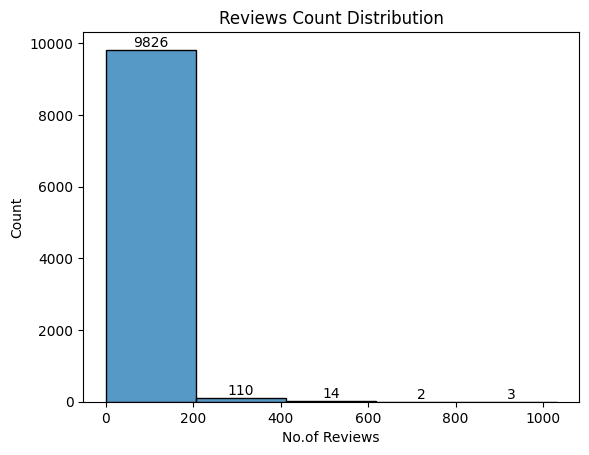

In [29]:
# Univariate

ax = sns.histplot(zoto["Reviews_count"], bins=5)

# Add values on top of histogram blocks
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, str(int(height)), ha='center', va='bottom')

# Add labels
plt.xlabel('No.of Reviews')
plt.ylabel('Count')
plt.title('Reviews Count Distribution')

# Show plot
plt.show()


Based on the above analysis we can conclude that:


*   Reviews count distribution is maximum for the range **0-210** (approx) accounting for a count of **9826**.
*   While for the range **210-410** its **110** (approx) and accordingly for rest of the others it deteriorating.





.

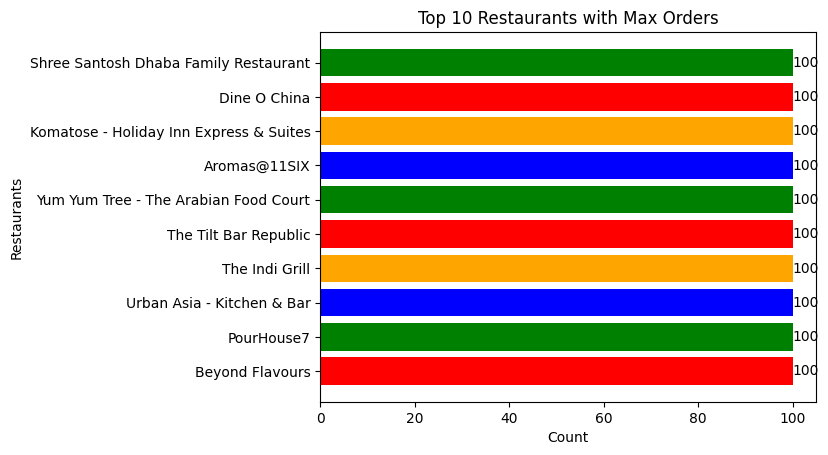

In [30]:
ret = zoto["Restaurant"].value_counts().head(10)
ret

colors = ["Red", "Green", "Blue", "Orange"]

for i, value in enumerate(ret.values):
    plt.text(value, i, str(value), ha='left', va='center')

ax= plt.barh(ret.index, ret.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants with Max Orders")
plt.show()


We can conclude from the above output that:


*   There are numerous restaurants with an average count of **100** who has taken maximum numbers of orders.
*   Few of the listed restaurants amongst them are Shree Santosh Dhaba, Dine O China, The Indi Grill, PourHouse7  etc.



.

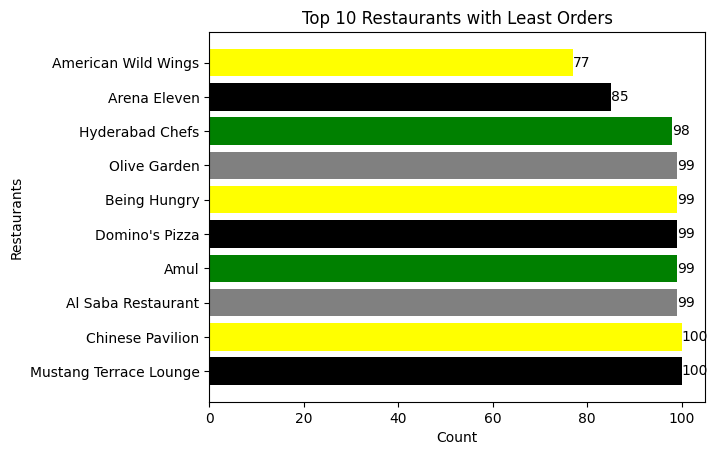

In [31]:
ret = zoto["Restaurant"].value_counts().tail(10)
ret

colors = ["Black", "Yellow", "Grey", "Green"]

for i, value in enumerate(ret.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.barh(ret.index, ret.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants with Least Orders")
plt.show()

We can drive following analysis from above chart:



*   **American Wild Wings** is the least preferred Restaurant in terms of order booking count of **77**.
*   Followed by American Wild, **Arena Eleven** is the next least order making restaurant with count **85**.



.

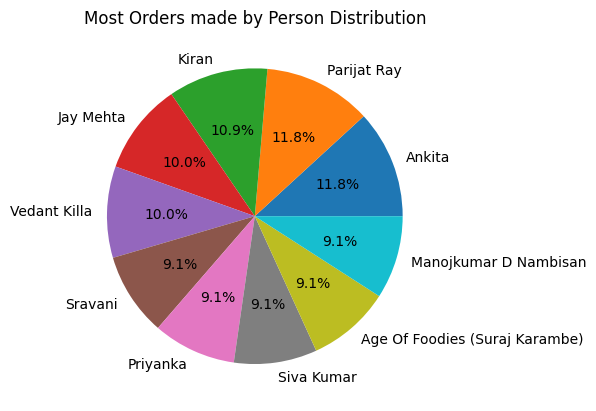

In [32]:
rev = zoto["Reviewer"].value_counts().head(10)

plt.pie(rev.values, autopct='%1.1f%%', labels=rev.index)

plt.title("Most Orders made by Person Distribution")

plt.show()

From the above analysis we can deduce following result:


*   **Parijat Ray** is the customer who has placed orders most number of times contributing to a percentage share of **11.8%**.
*   Followed by Parijat **Kiran** has placed most number of orders with Zomato with a percentage contribution of **10.9%**.



.

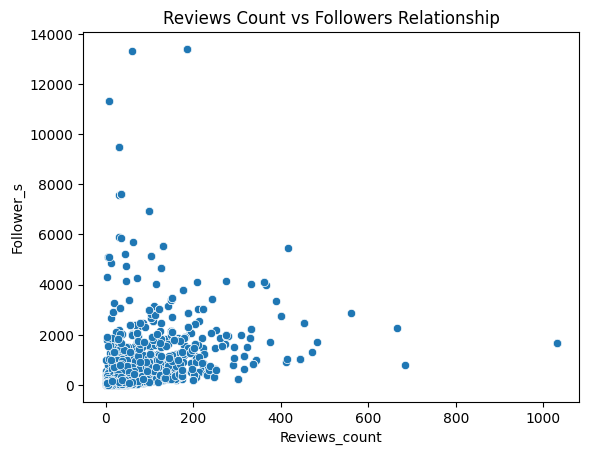

In [33]:
# Multivariate

sns.scatterplot(data=zoto, x="Reviews_count", y="Follower_s")

plt.title("Reviews Count vs Followers Relationship")

plt.show()

From the above scattter plot we can define following relationship:


*   Reviews count **vs** followers count is dense in the range **0-400** for reviews count whereas **0-6000** for followers count.
*   As we move away from the dense range the count starts decreasing considerably for both the features.




.

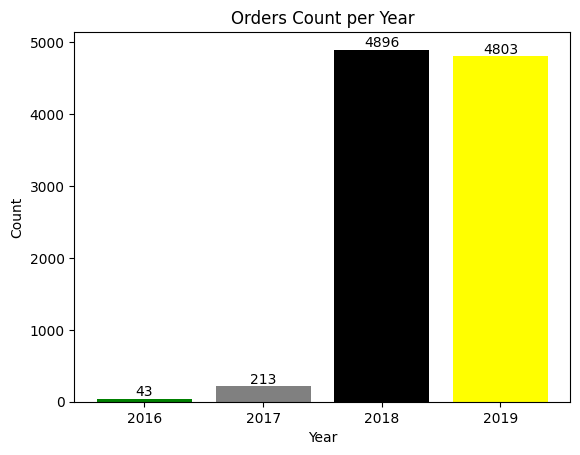

In [34]:
s = zoto["Year"].value_counts()

color = ["Black", "Grey"]

plt.bar(s.index, s.values, color = colors)
plt.xticks(s.index.astype(int))   # To avoid floating year displayed while plotting graph

for i, value in enumerate(s.values):
    plt.text(s.index[i], value, str(value), ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Orders Count per Year")
plt.show()

The bar chart above shows following results:


*   From **2016 to 2018**, the orders placed with Zomato shows an incremental **growth** but from **2018 to 2019** a slight **dip** can be observed.
*   The count of orders placed in year **2016** is **least** i.e., **43**. But for year **2018** it's **4896** which is **maximum**.



.

<ipython-input-35-20af7e86375b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(fol.index, rotation=45, ha='right')
<ipython-input-35-20af7e86375b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(lof.index, rotation=45, ha='right')


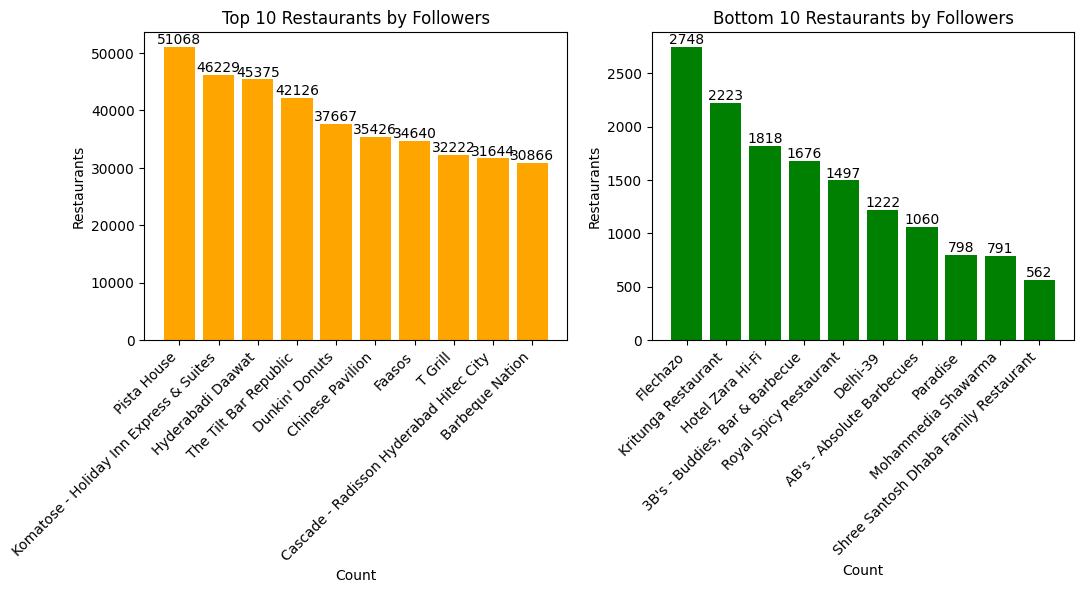

In [35]:
fol = zoto.groupby("Restaurant")["Follower_s"].sum().sort_values(ascending=False).head(10)
lof = zoto.groupby("Restaurant")["Follower_s"].sum().sort_values(ascending=False).tail(10)

# Create a horizontal bar plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first subplot with bar chart
axs[0].bar(fol.index, fol.values, color='Orange', width=0.8)
axs[0].set_title('Top 10 Restaurants by Followers')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Restaurants')
axs[0].set_xticklabels(fol.index, rotation=45, ha='right')

# Plot the second subplot with bar chart
axs[1].bar(lof.index, lof.values, color='Green', width=0.8)
axs[1].set_title('Bottom 10 Restaurants by Followers')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Restaurants')
axs[1].set_xticklabels(lof.index, rotation=45, ha='right')

# Add values on top of the bars for the first subplot
for i, value in enumerate(fol.values):
    axs[0].text(i, value, str(value), ha='center', va='bottom')

# Add values on top of the bars for the second subplot
for i, value in enumerate(lof.values):
    axs[1].text(i, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

From the above chart we can find out following analysis:



*   **Pista House** is the restaurant with **hightest** no.of followers i.e., **51068** amongst all the other restaurants.
*   **Komatose** is the **next highest** followed restaurant in the list after Pista House with a followers count of **46228**.
*   **Shree Santosh Dhaba** has **least** followers with a count of **562** followed by **791** of **Mohammedia**.





.

<ipython-input-36-0d56d0a907d4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(rate.index, rotation=45, ha='right')
<ipython-input-36-0d56d0a907d4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(etar.index, rotation=45, ha='right')


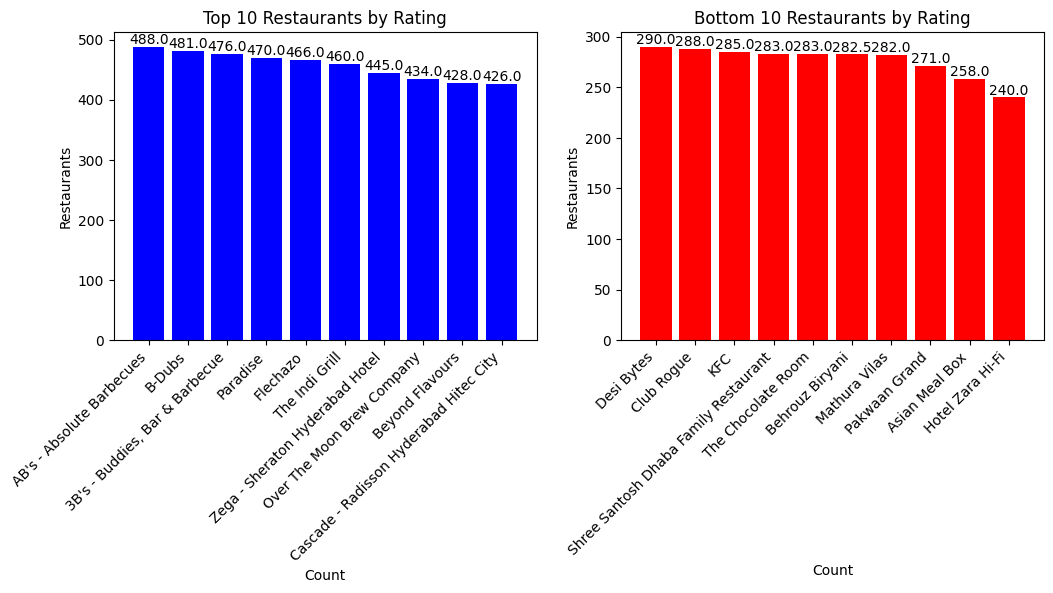

In [36]:
# Group the data and calculate the sum of ratings for each restaurant
rate = zoto.groupby("Restaurant")["Rating"].sum().sort_values(ascending=False).head(10)
etar = zoto.groupby("Restaurant")["Rating"].sum().sort_values(ascending=False).tail(10)

# Create a horizontal bar plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first subplot with bar chart
axs[0].bar(rate.index, rate.values, color='blue', width=0.8)
axs[0].set_title('Top 10 Restaurants by Rating')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Restaurants')
axs[0].set_xticklabels(rate.index, rotation=45, ha='right')

# Plot the second subplot with bar chart
axs[1].bar(etar.index, etar.values, color='red', width=0.8)
axs[1].set_title('Bottom 10 Restaurants by Rating')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Restaurants')
axs[1].set_xticklabels(etar.index, rotation=45, ha='right')

# Add values on top of the bars for the first subplot
for i, value in enumerate(rate.values):
    axs[0].text(i, value, str(value), ha='center', va='bottom')

# Add values on top of the bars for the second subplot
for i, value in enumerate(etar.values):
    axs[1].text(i, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()


We can state following conlcusion from above summary:



*   **Absolute Barbecues** has received the **most** number of **ratings** when combined, making it one of the **best** user preferred restaurant, constituting for a rating count of **488**.
*   Followed by AB's, **B-Dubs** is the **next most** liked restaurant for its food with a rating count of **481**.
*   **Hotel Zara HiFi** has the **least** rating amongst all the listed restaurants with a count of **240**. Followed by **Asian Meal Box** with count **258**.





